Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
df = pd.read_csv("uber.csv")

In [ ]:
# Pre-process the dataset
# Assuming 'fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' are relevant features
df = df[['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
#jo order dataset madhe ahe tyach order ne ghyacha

In [ ]:
df.dropna(inplace=True)

In [4]:
# Identify outliers using IQR method
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['fare_amount'] >= (Q1 - 1.5 * IQR)) & (df['fare_amount'] <= (Q3 + 1.5 * IQR))]

<Axes: >

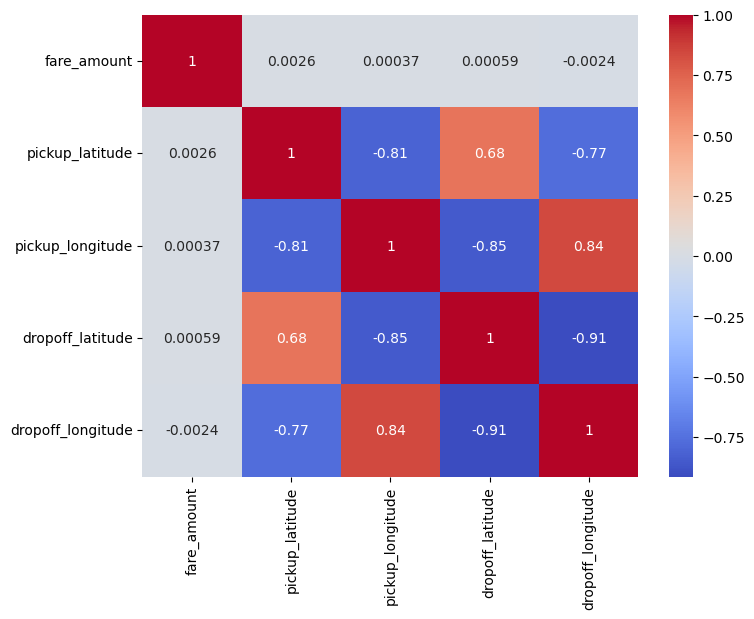

In [5]:
# Check correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [6]:
# Split dataset into features and target variable
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [10]:
# Implement Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)



In [11]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R2: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression - RMSE: 4.14, R2: 0.00
Random Forest Regression - RMSE: 2.25, R2: 0.70


In [12]:
def predict_fare(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, model):

  # Prepare new data as a DataFrame
  new_data = pd.DataFrame({
      'pickup_latitude': [pickup_latitude],
      'pickup_longitude': [pickup_longitude],
      'dropoff_latitude': [dropoff_latitude],
      'dropoff_longitude': [dropoff_longitude]  

  })

  # Scale the new data if using a scaled model
  if isinstance(model, StandardScaler):
      new_data_scaled = model.transform(new_data)
  else:
      new_data_scaled = new_data

  # Predict fare
  predicted_fare = model.predict(new_data_scaled)[0]

  return predicted_fare

In [13]:
# Example prediction using Linear Regression
predicted_fare_lr = predict_fare(40.7128, -74.0060, 40.7419, -73.9895, lr_model)
print(f"Predicted fare using Linear Regression: ${predicted_fare_lr:.2f}")

# Example prediction using Random Forest Regression
predicted_fare_rf = predict_fare(40.7128, -74.0060, 40.7419, -73.9895, rf_model)
print(f"Predicted fare using Random Forest Regression: ${predicted_fare_rf:.2f}")

Predicted fare using Linear Regression: $9.51
Predicted fare using Random Forest Regression: $7.99


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
